In [1]:
# Import Libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

## Load The DataSet csv and Cleaning Data

In [2]:
df=pd.read_csv('../Dataset/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# Check describe
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [4]:
# check Null Value
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
# check Columns
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# find the uniqe value
print(f"the Exprince Uniqe value{df['experience_level'].unique()}\n",f"the Employment Type Value{df['employment_type'].unique()}")

the Exprince Uniqe value['MI' 'SE' 'EN' 'EX']
 the Employment Type Value['FT' 'CT' 'PT' 'FL']


In [8]:
# now I want to drop Unnamed: 0 and salary_current columns
df.drop(['Unnamed: 0','salary_currency'],axis=1,inplace=True)


In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,150000,US,50,US,L


# I want Change Value to purpose show data csv

In [10]:
df['experience_level'].unique()
df['employment_type'].unique()
df['company_size'].unique()
df.remote_ratio.unique()

array([  0,  50, 100])

In [11]:
# i want to change the alias to cleary name
df['experience_level']=df['experience_level'].map({'EN':"Fresh-Graduate","MI":"Intermediate-Level","SE":"Advanced-Level",'EX':"Excetive-Level"})
df['employment_type']=df['employment_type'].map({"FT":"Full-Time","CT":"Contact-Time","PT":'Part-Time','FL':'Freelance'})
df['company_size']=df['company_size'].map({"L":"Large-Company","M":"Medium","S":"Start-Up"})
df['remote_ratio']=df['remote_ratio'].map({'0':'On-Site',"50":"Partially-Remote","100":"Fully-Remote"})

In [13]:
# I want to copy data frame to df_2
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediate-Level,Full-Time,Data Scientist,70000,79833,DE,NaN,DE,Large-Company
1,2020,Advanced-Level,Full-Time,Machine Learning Scientist,260000,260000,JP,NaN,JP,Start-Up
2,2020,Advanced-Level,Full-Time,Big Data Engineer,85000,109024,GB,NaN,GB,Medium
3,2020,Intermediate-Level,Full-Time,Product Data Analyst,20000,20000,HN,NaN,HN,Start-Up
4,2020,Advanced-Level,Full-Time,Machine Learning Engineer,150000,150000,US,NaN,US,Large-Company


In [14]:
# i want To Drop the remote_ratio
df.drop('remote_ratio',axis=1,inplace=True)


In [15]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size
0,2020,Intermediate-Level,Full-Time,Data Scientist,70000,79833,DE,DE,Large-Company
1,2020,Advanced-Level,Full-Time,Machine Learning Scientist,260000,260000,JP,JP,Start-Up
2,2020,Advanced-Level,Full-Time,Big Data Engineer,85000,109024,GB,GB,Medium
3,2020,Intermediate-Level,Full-Time,Product Data Analyst,20000,20000,HN,HN,Start-Up
4,2020,Advanced-Level,Full-Time,Machine Learning Engineer,150000,150000,US,US,Large-Company


In [19]:
print(f"the max value of salary is : {df.salary.max()}")
print(f"the max value of salary is : {df.salary_in_usd.max()}")


the max value of salary is : 30400000
the max value of salary is : 600000


<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

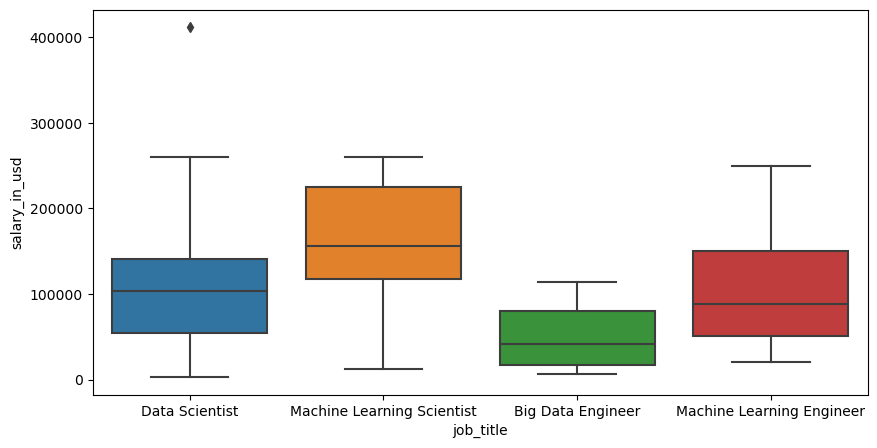

In [44]:
# Plot The Data
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x='job_title',y='salary_in_usd',data=df_en_ex,)

In [23]:
df.job_title.head()

0                Data Scientist
1    Machine Learning Scientist
2             Big Data Engineer
3          Product Data Analyst
4     Machine Learning Engineer
Name: job_title, dtype: object

In [32]:
df_en_ex=df[(df['job_title']=='Data Scientist')|(df['job_title']=='Machine Learning Scientist')|(df['job_title']=='Big Data Engineer')|(df['job_title']=="Machine Learning Engineer")]

In [57]:
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [63]:
df[df['company_location']=='JP']

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size
1,2020,Advanced-Level,Full-Time,Machine Learning Scientist,260000,260000,JP,JP,Start-Up
16,2020,Fresh-Graduate,Full-Time,Data Engineer,4450000,41689,JP,JP,Start-Up
136,2021,Intermediate-Level,Full-Time,ML Engineer,7000000,63711,JP,JP,Start-Up
137,2021,Intermediate-Level,Full-Time,ML Engineer,8500000,77364,JP,JP,Start-Up
150,2021,Advanced-Level,Full-Time,Director of Data Science,168000,168000,JP,JP,Start-Up
189,2021,Intermediate-Level,Full-Time,Machine Learning Engineer,74000,74000,JP,JP,Start-Up
